<a href="https://colab.research.google.com/github/qhfks27/rani01/blob/master/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5_4_3_%EC%88%98%EC%B9%98%EB%AF%B8%EB%B6%84~.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.3 수치미분
경사법에서는 기울기(경사)값을 기준으로 나아갈 방향을 정한다.

##4.3.1 미분
${dy \over dx} = \lim_{h \to \infty} {f(x+h)-f(x) \over h}$  


In [0]:
#나쁜 구현 예
def numerical_diff(f, x):    #함수이름 : 수치미분(numerical differentiation)
    h = 10e-50
    return (f(x + h) - f(x)) / h

In [0]:
import numpy as np
np.float32(1e-50)

0.0

반올림 오차는 소수점 8자리 이하의 작은 값이 생략되어 최종 계산 결과에 오차가 생기게 함.  
h를 10e-4정도의 값으로 설정하게 되면 좋은 결과를 얻는다고 함.  
  
진정한 미분은 $x$의 위치에서의 함수의 기울기(접선)에 해당하지만, $ {f(x+h)-f(x) \over h}$ 에서는 x+h 와 x 사이의 기울기임으로 정확히 일치하지는 않는다.  
이 오차를 줄이기 위해 **중심 차분** 혹은 **중앙 차분** 방법을 사용한다.

In [0]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

##4.3.2 수치 미분의 예
$ y = 0.01x^2 + 0.1x$

In [0]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

<function matplotlib.pyplot.show>

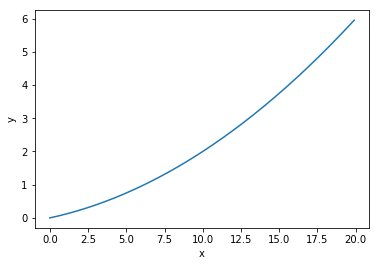

In [0]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show

In [0]:
numerical_diff(function_1, 5)      

0.1999999999990898

In [0]:
numerical_diff(function_1, 10)

0.2999999999986347

${df(x) \over dy} = 0.02x + 0.1$  
$x = 5$일 때, 0.2  
$x = 10$일 때, 0.3  
오차가 굉장히 작음.

0.1999999999990898


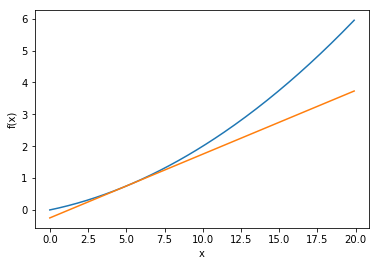

In [0]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

0.2999999999986347


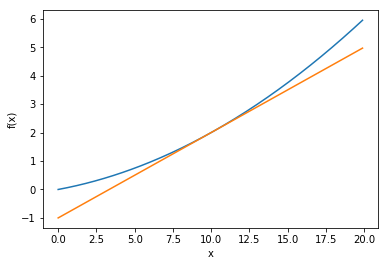

In [0]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

##4.3.3 편미분
$f(x_0, x_1) = x^2_0 + x^2_1$

In [0]:
def function_2(x):
    return x[0]**2 + x[1]**2  #return np.sum(x**2)

*문제 1 :$x_0$ = 3, $x_1$ = 4일 때, $x_0$에 대한 편미분 ${\partial f\over\partial x_0}$ 를 구하라.

In [0]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

*문제 2 :$x_0$ = 3, $x_1$ = 4일 때, $x_1$에 대한 편미분 ${\partial f\over\partial x_1}$ 를 구하라.

In [0]:
def function_tmp2(x2):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

NameError: ignored

#4.4 기울기


In [0]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  #x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [0]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

In [0]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

In [0]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

In [0]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

In [0]:
기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향

##4.4.1 경사법(경사 하강법)
기울기를 이용해 함수의 최솟값을 찾으려는 방법   
기울기가 가리키는 곳이 함수의 최소값이 없는 경우가 대부분이지만, 그 방향으로 가야 함수의 값을 줄일 수 있다.
(경사법은 기울기가 0인 장소를 찾지만 그 지점이 반드시 최소값이 되지않고 극소값이나 안장점이 될 수 있다.)  
(최소값을 찾는 경사법 : **경사 하강법** , 최대값을 찾는 경사법 : **경사 상승법**)  

$x_0 = x_0 - \eta{\partial f\over\partial x_0}$   
$x_1 = x_1 - \eta{\partial f\over\partial x_1}$    

($\eta$ : 학습률, learning rate : 한 번의 학습으로 얼마만큼 학습해야 할지, 매개변수 값을 얼마나 갱신하느냐를 정하는 것, 특정 값으로 미리 정해두어야 함.)

In [0]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
      grad = numerical_gradient(f, x)
      x -= lr * grad

  return x

f : 최적화하려는 함수  
init_x : 초기값  
lr : learning rate 학습률
step_num : 경사법에 따른 반복 횟수
numerical_gradient(f, x) 로 함수 기울기 구함
기울기 * 학습률로 갱신하는 처리를 step_num번 반복

*문제 : 경사법으로 $f(x_0, x_1)=x^2_0 + x^2_1$의 최솟값을 구하라.

In [0]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

In [0]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

##4.4.2 신경망에서의 기울기
형상 2X3, 가중치 **W**,  손실함수 **L**
경사 : ${\partial L\over\partial W}$

$W = \begin{pmatrix} w_{11} & w_{12} &w_{13}\\ w_{21} & w_{22} & w_{23} \end{pmatrix}$ 
   
    
${\partial L\over\partial W} = \begin{pmatrix} {\partial L\over\partial w_{11}} & {\partial L\over\partial w_{12}} &{\partial L\over\partial w_{13}}\\ {\partial L\over\partial w_{21}} & {\partial L\over\partial w_{22}} & {\partial L\over\partial w_{23}} \end{pmatrix}$

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

In [0]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)

class simpleNet:                              #형상이 2X3인 가중치 매개변수 하나를 인스턴스 변수로 갖는다.
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):                     #예측 수행
        return np.dot(x, self.W)
 
    def loss(self, x, t):                     #손실함수 , x는 입력 데이터, t는 정답 레이블
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [0]:
net = simpleNet()
print(net.W)  #가중치 매개변수

In [0]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

In [0]:
np.argmax(p)

In [0]:
t = np.array([0, 0, 1])

In [0]:
net.loss(x, t)

In [0]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

In [0]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

In [0]:
print(dW)

#4.5 학습 알고리즘 구현하기
-전제  
 :신경망에는 적응 가능한 가중치와 편향이 있다. 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 학습이라 한다.

-1단계 : 미니배치  
 훈련 데이터 중 일부를 무작위로 가져온 데이터를 미니배치라고 하며, 이 미니배치의 손실 함수 값을 줄이는 것이 목표이다.

-2단계 : 기울기 산출
 각 가중치 매개변수의 기울기를 구해서 손실 함수 값을 가장 작게 하는 방향을 제시한다.

-3단계 : 매개변수 갱신
-4단계 : 1~3단계 반복

**확률적 경사 하강법(stochastic gradient descent, SGD)**
: 확률적으로 무작위로 골라낸 데이터에 대해 수행하는 경사 하강법


##4.5.1 2층 신경망 클래스 구현하기

In [0]:

from google.colab import drive

drive.mount('/content/gdrive')

In [0]:
import os
import sys
sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/common')
from functions import *
from gradient import numerical_gradient

In [0]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [0]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape

In [0]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['b1'].shape

In [0]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W2'].shape

In [0]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['b2'].shape

In [0]:
x = np.random.rand(100, 784)
y = net.predict(x)


In [0]:
import numpy as np
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

grads['W1'].shape

In [0]:
grads['b1'].shape

In [0]:
grads['W2'].shape

In [0]:
grads['b2'].shape

##4.5.2 미니배치 학습 구현하기

In [0]:
import numpy as np
import os
import sys
sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/dataset')
from mnist import load_mnist
import os
import sys
sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/ch04')
from two_layer_net import TwoLayerNet

ModuleNotFoundError: ignored

In [0]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

#하이퍼파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss =  network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

##4.5.3 시험 데이터로 평가하기


In [0]:
import numpy as np
import os
import sys
sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/dataset')
from mnist import load_mnist
import os
import sys
sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/ch04')
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

#하이퍼파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)



train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss =  network.loss(x_batch, t_batch)
    train_loss_list.append(loss)


if i % iter_per_epoch == 0 :
    train_acc =  network.accuracy(x_train, t_train)
    text_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list,append(test_acc)
    print("train acc, test acc :" + str(train_acc) + "," + str(test_acc))